In [3]:
import requests
import pandas as pd
import re
pd.set_option('display.max_columns', None)

In [4]:
def llamar_api(url):
    llamada = requests.get(url)
    if llamada.status_code != 200:
        print(f"Motivo llamada fallida {llamada.reason}")
    else:
        return llamada.json()

In [5]:
#prueba uno error
url_balldontlie = "https://api.balldontlie.io/v1/players"
resultados_players = llamar_api(url_balldontlie)

Motivo llamada fallida Unauthorized


In [6]:
api_key_balldontlie = "ca5dbae9-beec-47b4-b3d1-f181275bdcd6"
url_balldontlie = "https://api.balldontlie.io/v1/players"
url_players = requests.get(url_balldontlie)
resultados_players = llamar_api(url_balldontlie)
df_balldontlie = pd.DataFrame(resultados_players['data'])
#header o param, no estoy pasando la api key, por eso da error

Motivo llamada fallida Unauthorized


TypeError: 'NoneType' object is not subscriptable

In [42]:
#prueba dos error
api_key = "ca5dbae9-beec-47b4-b3d1-f181275bdcd6"
url_balldontlie = f"https://api.balldontlie.io/v1/players?Authorization={api_key_balldontlie}"
url_players = requests.get(url_balldontlie)

#df_balldontlie = pd.DataFrame(requests.get(url_players).json())

#df_balldontlie.head(5)

In [8]:
url_players.status_code

401

In [9]:
res_jugadores = requests.get(f"http://api.balldontlie.io/v1/players", headers = {'Authorization': api_key_balldontlie} ) # cada una pone la kpi que haya generado

In [10]:
res_jugadores.status_code

200

In [47]:
per_page = 100
total_jugadores = 200
api_key_balldontlie = "ca5dbae9-beec-47b4-b3d1-f181275bdcd6"
pages = total_jugadores // per_page

In [19]:
datos = res_jugadores.json()
datos

{'data': [{'id': 1,
   'first_name': 'Alex',
   'last_name': 'Abrines',
   'position': 'G',
   'height': '6-6',
   'weight': '190',
   'jersey_number': '8',
   'college': 'FC Barcelona',
   'country': 'Spain',
   'draft_year': 2013,
   'draft_round': 2,
   'draft_number': 32,
   'team': {'id': 21,
    'conference': 'West',
    'division': 'Northwest',
    'city': 'Oklahoma City',
    'name': 'Thunder',
    'full_name': 'Oklahoma City Thunder',
    'abbreviation': 'OKC'}},
  {'id': 2,
   'first_name': 'Jaylen',
   'last_name': 'Adams',
   'position': 'G',
   'height': '6-0',
   'weight': '225',
   'jersey_number': '10',
   'college': 'St. Bonaventure',
   'country': 'USA',
   'draft_year': None,
   'draft_round': None,
   'draft_number': None,
   'team': {'id': 1,
    'conference': 'East',
    'division': 'Southeast',
    'city': 'Atlanta',
    'name': 'Hawks',
    'full_name': 'Atlanta Hawks',
    'abbreviation': 'ATL'}},
  {'id': 3,
   'first_name': 'Steven',
   'last_name': 'Adams',


In [20]:
type(datos)

dict

In [21]:
datos.keys()

dict_keys(['data', 'meta'])

In [23]:
datos['data']

[{'id': 1,
  'first_name': 'Alex',
  'last_name': 'Abrines',
  'position': 'G',
  'height': '6-6',
  'weight': '190',
  'jersey_number': '8',
  'college': 'FC Barcelona',
  'country': 'Spain',
  'draft_year': 2013,
  'draft_round': 2,
  'draft_number': 32,
  'team': {'id': 21,
   'conference': 'West',
   'division': 'Northwest',
   'city': 'Oklahoma City',
   'name': 'Thunder',
   'full_name': 'Oklahoma City Thunder',
   'abbreviation': 'OKC'}},
 {'id': 2,
  'first_name': 'Jaylen',
  'last_name': 'Adams',
  'position': 'G',
  'height': '6-0',
  'weight': '225',
  'jersey_number': '10',
  'college': 'St. Bonaventure',
  'country': 'USA',
  'draft_year': None,
  'draft_round': None,
  'draft_number': None,
  'team': {'id': 1,
   'conference': 'East',
   'division': 'Southeast',
   'city': 'Atlanta',
   'name': 'Hawks',
   'full_name': 'Atlanta Hawks',
   'abbreviation': 'ATL'}},
 {'id': 3,
  'first_name': 'Steven',
  'last_name': 'Adams',
  'position': 'C',
  'height': '6-11',
  'weight'

In [38]:
print(datos['data'][0]['first_name'])
print(datos['data'][0]['last_name'])
print(datos['data'][0]['team']['full_name'])

Alex
Abrines
Oklahoma City Thunder


In [49]:
api_key = "ca5dbae9-beec-47b4-b3d1-f181275bdcd6"
dicc_players = {"nombres": [], "apellido" : [], "equipo" : []}
for page in range(1, pages + 1):
    res_jugadores = requests.get(f"http://api.balldontlie.io/v1/players", 
                                 headers={'Authorization': api_key}, 
                                 params={'next_cursor': page, 'per_page': per_page})
    print(f"La llamada a la API para la página {page} nos ha dado una respuesta de tipo: {res_jugadores.status_code}")
    if res_jugadores.status_code != 200:  # Si la respuesta no fue exitosa
        print(f"El motivo por el que la llamada falló es {res_jugadores.reason}")
        break
    else:
        res_jugadores = res_jugadores.json()


La llamada a la API para la página 1 nos ha dado una respuesta de tipo: 200
La llamada a la API para la página 2 nos ha dado una respuesta de tipo: 200


Clase mañana 2.1. API

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import pandas as pd
import re
pd.set_option('display.max_columns', None)

In [ ]:
url = "https://dog.ceo/api/breeds/list/all"

respon = requests.get(url)

In [ ]:
respon.status_code

200

In [ ]:
respon.content


b'{"message":{"affenpinscher":[],"african":[],"airedale":[],"akita":[],"appenzeller":[],"australian":["kelpie","shepherd"],"bakharwal":["indian"],"basenji":[],"beagle":[],"bluetick":[],"borzoi":[],"bouvier":[],"boxer":[],"brabancon":[],"briard":[],"buhund":["norwegian"],"bulldog":["boston","english","french"],"bullterrier":["staffordshire"],"cattledog":["australian"],"cavapoo":[],"chihuahua":[],"chippiparai":["indian"],"chow":[],"clumber":[],"cockapoo":[],"collie":["border"],"coonhound":[],"corgi":["cardigan"],"cotondetulear":[],"dachshund":[],"dalmatian":[],"dane":["great"],"danish":["swedish"],"deerhound":["scottish"],"dhole":[],"dingo":[],"doberman":[],"elkhound":["norwegian"],"entlebucher":[],"eskimo":[],"finnish":["lapphund"],"frise":["bichon"],"gaddi":["indian"],"germanshepherd":[],"greyhound":["indian","italian"],"groenendael":[],"havanese":[],"hound":["afghan","basset","blood","english","ibizan","plott","walker"],"husky":[],"keeshond":[],"kelpie":[],"kombai":[],"komondor":[],"k

In [ ]:
respon.json()

{'message': {'affenpinscher': [],
  'african': [],
  'airedale': [],
  'akita': [],
  'appenzeller': [],
  'australian': ['kelpie', 'shepherd'],
  'bakharwal': ['indian'],
  'basenji': [],
  'beagle': [],
  'bluetick': [],
  'borzoi': [],
  'bouvier': [],
  'boxer': [],
  'brabancon': [],
  'briard': [],
  'buhund': ['norwegian'],
  'bulldog': ['boston', 'english', 'french'],
  'bullterrier': ['staffordshire'],
  'cattledog': ['australian'],
  'cavapoo': [],
  'chihuahua': [],
  'chippiparai': ['indian'],
  'chow': [],
  'clumber': [],
  'cockapoo': [],
  'collie': ['border'],
  'coonhound': [],
  'corgi': ['cardigan'],
  'cotondetulear': [],
  'dachshund': [],
  'dalmatian': [],
  'dane': ['great'],
  'danish': ['swedish'],
  'deerhound': ['scottish'],
  'dhole': [],
  'dingo': [],
  'doberman': [],
  'elkhound': ['norwegian'],
  'entlebucher': [],
  'eskimo': [],
  'finnish': ['lapphund'],
  'frise': ['bichon'],
  'gaddi': ['indian'],
  'germanshepherd': [],
  'greyhound': ['indian',

In [ ]:
respon.json().keys()
respon.json()['status']
respon.json()['message']

{'affenpinscher': [],
 'african': [],
 'airedale': [],
 'akita': [],
 'appenzeller': [],
 'australian': ['kelpie', 'shepherd'],
 'bakharwal': ['indian'],
 'basenji': [],
 'beagle': [],
 'bluetick': [],
 'borzoi': [],
 'bouvier': [],
 'boxer': [],
 'brabancon': [],
 'briard': [],
 'buhund': ['norwegian'],
 'bulldog': ['boston', 'english', 'french'],
 'bullterrier': ['staffordshire'],
 'cattledog': ['australian'],
 'cavapoo': [],
 'chihuahua': [],
 'chippiparai': ['indian'],
 'chow': [],
 'clumber': [],
 'cockapoo': [],
 'collie': ['border'],
 'coonhound': [],
 'corgi': ['cardigan'],
 'cotondetulear': [],
 'dachshund': [],
 'dalmatian': [],
 'dane': ['great'],
 'danish': ['swedish'],
 'deerhound': ['scottish'],
 'dhole': [],
 'dingo': [],
 'doberman': [],
 'elkhound': ['norwegian'],
 'entlebucher': [],
 'eskimo': [],
 'finnish': ['lapphund'],
 'frise': ['bichon'],
 'gaddi': ['indian'],
 'germanshepherd': [],
 'greyhound': ['indian', 'italian'],
 'groenendael': [],
 'havanese': [],
 'houn

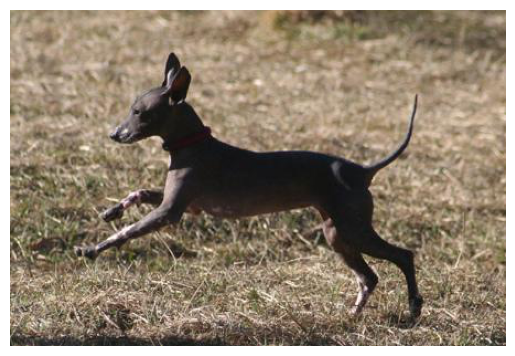

In [ ]:
response = requests.get("https://dog.ceo/api/breeds/image/random")
if response.status_code == 200:
    image_url = response.json()["message"]
    image_data = requests.get(image_url).content
    image = Image.open(BytesIO(image_data))
    
    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [ ]:
# harry potter
https://hp-api.onrender.com/

https://hp-api.onrender.com/

In [ ]:
url = "https://hp-api.onrender.com/api/characters"
response = requests.get(url)

print(response.status_code)
print(response.content)

200
b'[{"id":"9e3f7ce4-b9a7-4244-b709-dae5c1f1d4a8","name":"Harry Potter","alternate_names":["The Boy Who Lived","The Chosen One","Undesirable No. 1","Potty"],"species":"human","gender":"male","house":"Gryffindor","dateOfBirth":"31-07-1980","yearOfBirth":1980,"wizard":true,"ancestry":"half-blood","eyeColour":"green","hairColour":"black","wand":{"wood":"holly","core":"phoenix tail feather","length":11},"patronus":"stag","hogwartsStudent":true,"hogwartsStaff":false,"actor":"Daniel Radcliffe","alternate_actors":[],"alive":true,"image":"https://ik.imagekit.io/hpapi/harry.jpg"},{"id":"4c7e6819-a91a-45b2-a454-f931e4a7cce3","name":"Hermione Granger","alternate_names":["Hermy","Know-it-all","Miss Grant","Herm-own-ninny"],"species":"human","gender":"female","house":"Gryffindor","dateOfBirth":"19-09-1979","yearOfBirth":1979,"wizard":true,"ancestry":"muggleborn","eyeColour":"brown","hairColour":"brown","wand":{"wood":"vine","core":"dragon heartstring","length":10.75},"patronus":"otter","hogwartsS

In [ ]:
response.content

b'[{"id":"9e3f7ce4-b9a7-4244-b709-dae5c1f1d4a8","name":"Harry Potter","alternate_names":["The Boy Who Lived","The Chosen One","Undesirable No. 1","Potty"],"species":"human","gender":"male","house":"Gryffindor","dateOfBirth":"31-07-1980","yearOfBirth":1980,"wizard":true,"ancestry":"half-blood","eyeColour":"green","hairColour":"black","wand":{"wood":"holly","core":"phoenix tail feather","length":11},"patronus":"stag","hogwartsStudent":true,"hogwartsStaff":false,"actor":"Daniel Radcliffe","alternate_actors":[],"alive":true,"image":"https://ik.imagekit.io/hpapi/harry.jpg"},{"id":"4c7e6819-a91a-45b2-a454-f931e4a7cce3","name":"Hermione Granger","alternate_names":["Hermy","Know-it-all","Miss Grant","Herm-own-ninny"],"species":"human","gender":"female","house":"Gryffindor","dateOfBirth":"19-09-1979","yearOfBirth":1979,"wizard":true,"ancestry":"muggleborn","eyeColour":"brown","hairColour":"brown","wand":{"wood":"vine","core":"dragon heartstring","length":10.75},"patronus":"otter","hogwartsStude

In [ ]:
datos = response.json()
datos

[{'id': '9e3f7ce4-b9a7-4244-b709-dae5c1f1d4a8',
  'name': 'Harry Potter',
  'alternate_names': ['The Boy Who Lived',
   'The Chosen One',
   'Undesirable No. 1',
   'Potty'],
  'species': 'human',
  'gender': 'male',
  'house': 'Gryffindor',
  'dateOfBirth': '31-07-1980',
  'yearOfBirth': 1980,
  'wizard': True,
  'ancestry': 'half-blood',
  'eyeColour': 'green',
  'hairColour': 'black',
  'wand': {'wood': 'holly', 'core': 'phoenix tail feather', 'length': 11},
  'patronus': 'stag',
  'hogwartsStudent': True,
  'hogwartsStaff': False,
  'actor': 'Daniel Radcliffe',
  'alternate_actors': [],
  'alive': True,
  'image': 'https://ik.imagekit.io/hpapi/harry.jpg'},
 {'id': '4c7e6819-a91a-45b2-a454-f931e4a7cce3',
  'name': 'Hermione Granger',
  'alternate_names': ['Hermy', 'Know-it-all', 'Miss Grant', 'Herm-own-ninny'],
  'species': 'human',
  'gender': 'female',
  'house': 'Gryffindor',
  'dateOfBirth': '19-09-1979',
  'yearOfBirth': 1979,
  'wizard': True,
  'ancestry': 'muggleborn',
  'ey

In [ ]:
datos[0]

{'id': '9e3f7ce4-b9a7-4244-b709-dae5c1f1d4a8',
 'name': 'Harry Potter',
 'alternate_names': ['The Boy Who Lived',
  'The Chosen One',
  'Undesirable No. 1',
  'Potty'],
 'species': 'human',
 'gender': 'male',
 'house': 'Gryffindor',
 'dateOfBirth': '31-07-1980',
 'yearOfBirth': 1980,
 'wizard': True,
 'ancestry': 'half-blood',
 'eyeColour': 'green',
 'hairColour': 'black',
 'wand': {'wood': 'holly', 'core': 'phoenix tail feather', 'length': 11},
 'patronus': 'stag',
 'hogwartsStudent': True,
 'hogwartsStaff': False,
 'actor': 'Daniel Radcliffe',
 'alternate_actors': [],
 'alive': True,
 'image': 'https://ik.imagekit.io/hpapi/harry.jpg'}